In [18]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem, PandasTools
import glob2
sys.path.append('/Users/kate_fieseler/PycharmProjects/syndirella')
from syndirella.slipper._placement_data import make_fragmenstein_placements_csv

In [12]:
output_path = '/Users/kate_fieseler/PycharmProjects/EV-A71-2A-syndirella-run-2/designs/x1346_analogues_16_placed'
output_dir = '/Users/kate_fieseler/PycharmProjects/EV-A71-2A-syndirella-run-2/designs/x1346_analogues_16_placed'
make_fragmenstein_placements_csv(output_path, output_dir)

'/Users/kate_fieseler/PycharmProjects/EV-A71-2A-syndirella-run-2/designs/x1346_analogues_16_placed/fragmenstein_placements.csv'

In [13]:
df = pd.read_csv('/Users/kate_fieseler/PycharmProjects/EV-A71-2A-syndirella-run-2/designs/x1346_analogues_16_placed/fragmenstein_placements.csv')
# remove rows that contain any inf values
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
df

,name,ΔΔG,ΔG_bound,ΔG_unbound,comRMSD
0,kate-x1346-analogues-aug-2024-14,-2.809916,-424.016179,-426.826094,0.429715
2,kate-x1346-analogues-aug-2024-13,-1.579630,-418.583731,-420.163361,0.515984
4,kate-x1346-analogues-aug-2024-12,-2.676424,-413.290486,-415.966910,0.772989
6,kate-x1346-analogues-aug-2024-15,-2.984104,-408.472778,-411.456883,0.715417
9,kate-x1346-analogues-aug-2024-5,-0.929856,-414.315396,-415.245252,0.503357
11,kate-x1346-analogues-aug-2024-2,-2.392600,-420.541607,-422.934207,0.344860
13,kate-x1346-analogues-aug-2024-3,-1.300386,-423.816617,-425.117003,0.302679
15,kate-x1346-analogues-aug-2024-4,-2.559900,-410.596691,-413.156591,0.688265
16,kate-x1346-analogues-aug-2024-10,-2.472830,-422.133836,-424.606667,0.354478
18,kate-x1346-analogues-aug-2024-11,-1.389883,-421.895148,-423.285030,0.304789


In [14]:
df = df[df['ΔΔG'] < 0]
df

,name,ΔΔG,ΔG_bound,ΔG_unbound,comRMSD
0,kate-x1346-analogues-aug-2024-14,-2.809916,-424.016179,-426.826094,0.429715
2,kate-x1346-analogues-aug-2024-13,-1.579630,-418.583731,-420.163361,0.515984
4,kate-x1346-analogues-aug-2024-12,-2.676424,-413.290486,-415.966910,0.772989
6,kate-x1346-analogues-aug-2024-15,-2.984104,-408.472778,-411.456883,0.715417
9,kate-x1346-analogues-aug-2024-5,-0.929856,-414.315396,-415.245252,0.503357
11,kate-x1346-analogues-aug-2024-2,-2.392600,-420.541607,-422.934207,0.344860
13,kate-x1346-analogues-aug-2024-3,-1.300386,-423.816617,-425.117003,0.302679
15,kate-x1346-analogues-aug-2024-4,-2.559900,-410.596691,-413.156591,0.688265
16,kate-x1346-analogues-aug-2024-10,-2.472830,-422.133836,-424.606667,0.354478
18,kate-x1346-analogues-aug-2024-11,-1.389883,-421.895148,-423.285030,0.304789


Text(0, 0.5, 'Count')

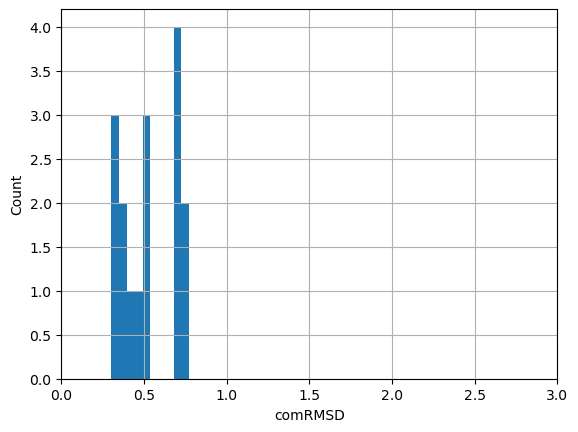

In [15]:
df['comRMSD'].hist()
# change x range to 0–3
plt.xlim(0, 3)
plt.xlabel('comRMSD')
plt.ylabel('Count')

In [29]:
mols = glob2.glob('/Users/kate_fieseler/PycharmProjects/EV-A71-2A-syndirella-run-2/designs/x1346_analogues_16_placed/*/*.minimised.mol')
w = Chem.SDWriter('/Users/kate_fieseler/PycharmProjects/EV-A71-2A-syndirella-run-2/designs/x1346_analogues_16_placed/x1346_analogues_negative_ddG_16.sdf')
for mol in mols:
    m = Chem.MolFromMolFile(mol)
    # write name of molecule to sdf
    m.SetProp('_Name', mol.split('/')[-1].split('.')[0])
    w.write(m)
w.close()

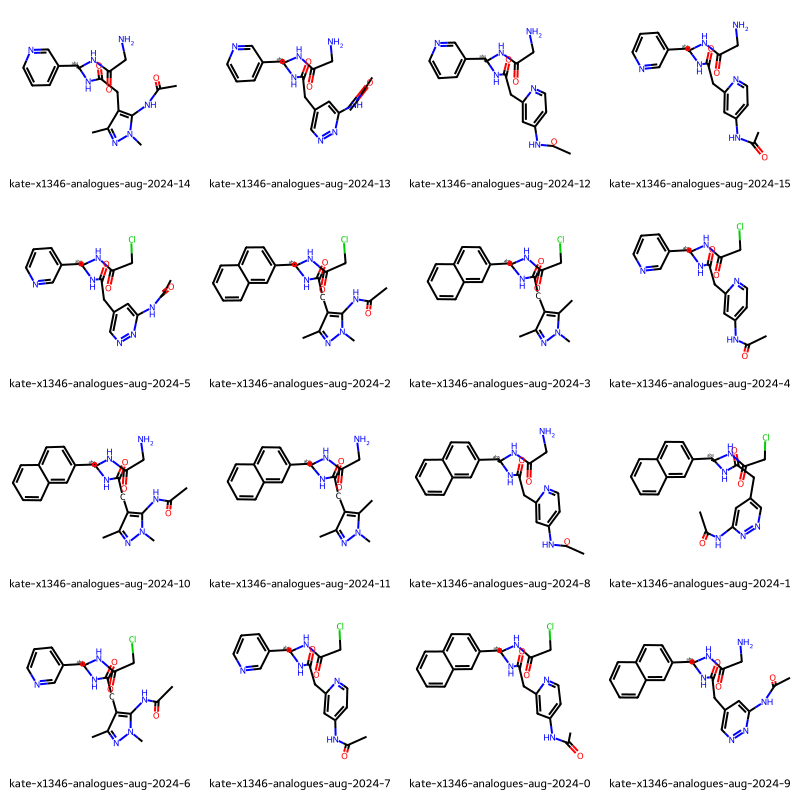

In [30]:
# get 2D view of all placed analogues
df = PandasTools.LoadSDF('/Users/kate_fieseler/PycharmProjects/EV-A71-2A-syndirella-run-2/designs/x1346_analogues_16_placed/x1346_analogues_negative_ddG_16.sdf')
PandasTools.FrameToGridImage(df, molsPerRow=4, subImgSize=(200, 200), legendsCol='ID')

,ID,ROMol
0,kate-x1346-analogues-aug-2024-14,
1,kate-x1346-analogues-aug-2024-13,
2,kate-x1346-analogues-aug-2024-12,
3,kate-x1346-analogues-aug-2024-15,
4,kate-x1346-analogues-aug-2024-5,
5,kate-x1346-analogues-aug-2024-2,
6,kate-x1346-analogues-aug-2024-3,
7,kate-x1346-analogues-aug-2024-4,
8,kate-x1346-analogues-aug-2024-10,
9,kate-x1346-analogues-aug-2024-11,

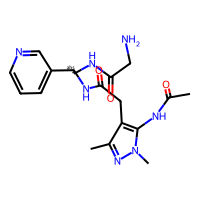
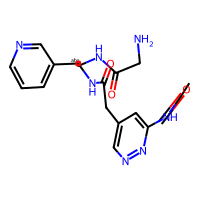
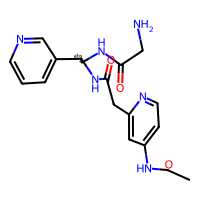
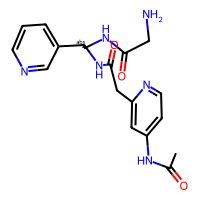
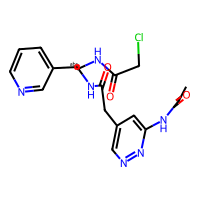
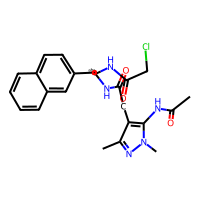
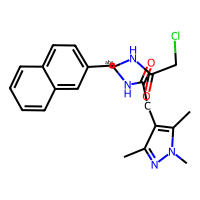
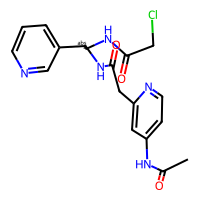
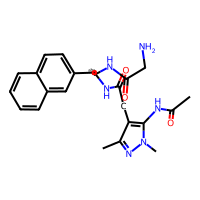
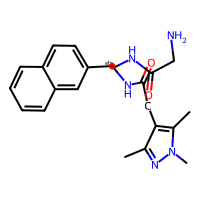
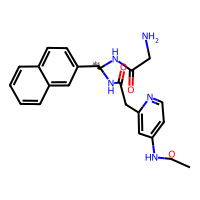
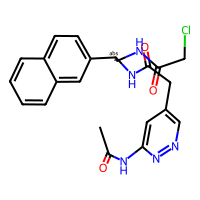
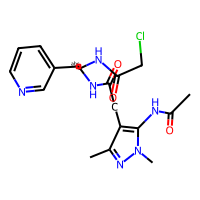
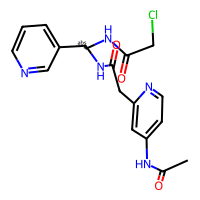
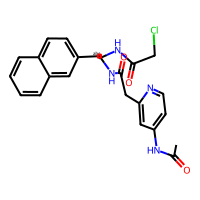
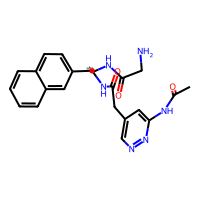

In [31]:
df